In [1]:
import numpy as np
import pandas as pd

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
import scipy.stats as stats

In [7]:
np.random.binomial(1, 0.5)

1

In [33]:
np.random.binomial(1000, 0.5)

531

In [48]:
n = np.random.binomial(20, .5, 10000)
(n>=15).mean()

0.0218

In [120]:
np.random.binomial(10, 1/6, 10000).mean()

1.6659

In [121]:
10/6

1.6666666666666667

In [133]:
x = np.random.normal(5, 2, size = 10000)

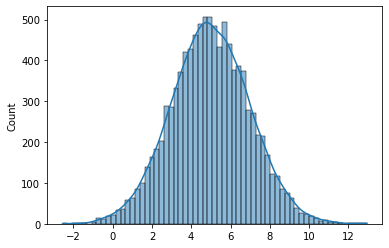

In [140]:
sns.distplot(x, kde = True, fill = True)

In [137]:
stats.skew(x)

0.0313288290263335

## Maximum Likelihood Estimation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.optimize import minimize 

In [2]:
# generate an independent variable 
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-15.162910
1,-9.595960,-22.916795
2,-9.191919,-17.152487
3,-8.787879,-19.166841
4,-8.383838,-11.902185


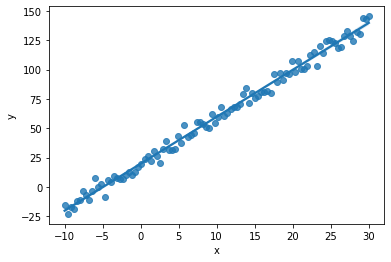

In [4]:
sns.regplot(x='x', y='y', data = df)
plt.show() 

In [5]:
features = sm.add_constant(df.x)
model = sm.OLS(y, features).fit()
model.summary()

C:\Users\sadhna kunj\Miniconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          1.07e-100
Time:                        13:24:32   Log-Likelihood:                -294.34
No. Observations:                 100   AIC:                             592.7
Df Residuals:                      98   BIC:                             597.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8341      0.611     32.455      0.000      18.621      21.047
x              4.0005      0.040    100.569      0.000       3.922       4.079
==============================================================================
Omnibus:                        3.384   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.407
Skew:                           0.212   Prob(JB):                        0.300
Kurtosis:                       2.369   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
res = model.resid
standard_dev = np.std(res)
standard_dev

4.592826316181191

In [10]:
# MLE function
def MLE_Norm(param):
    const, beta, std_dev = param
    # predict the output
    pred = const + beta*x
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 

In [11]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model 

      fun: 294.3434122939805
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.41060513e-05, -3.75166564e-04, -4.54747351e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 228
      nit: 34
   status: 0
  success: True
        x: array([19.83409515,  4.0005258 ,  4.59282107])